# LDA

In [9]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:

# Iris 데이터 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target


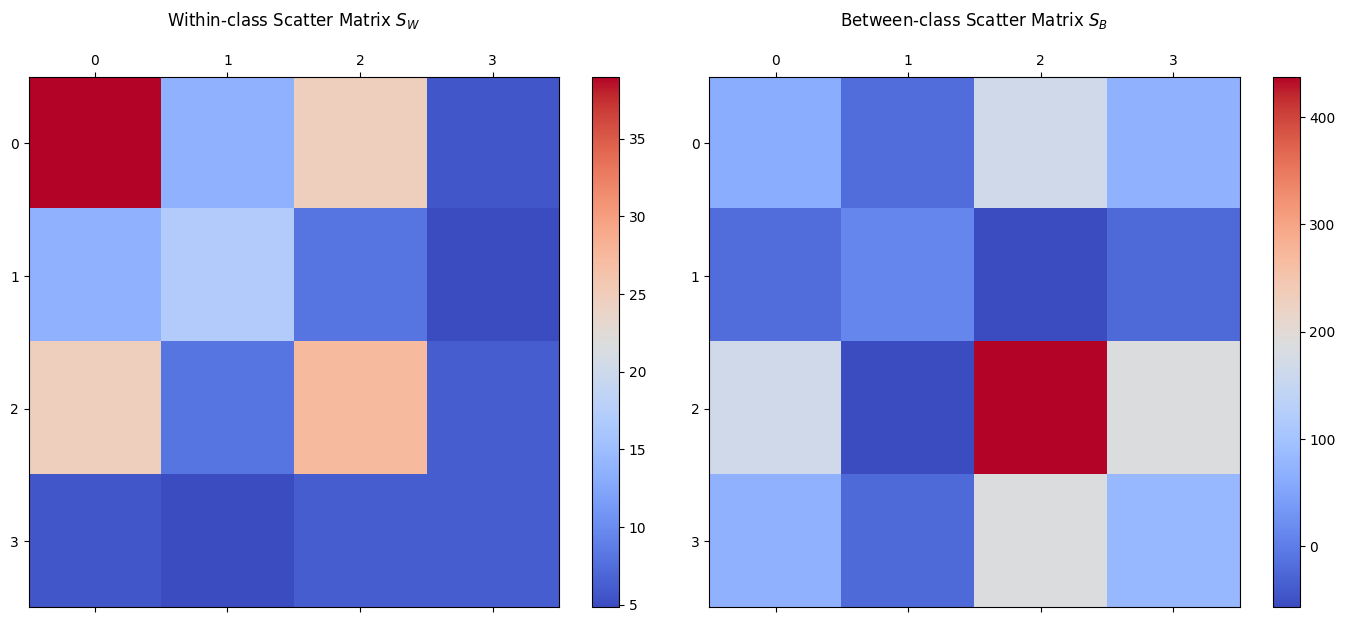

In [4]:

# Iris 데이터 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_features = X.shape[1]

# 전체 평균 벡터 계산
overall_mean = np.mean(X, axis=0)

# 클래스 내의 scatter matrix 계산
S_W = np.zeros((n_features, n_features))
for class_val in np.unique(y):
    mean_vec = np.mean(X[y == class_val], axis=0)
    class_sc_mat = np.zeros((n_features, n_features))
    for row in X[y == class_val]:
        row, mv = row.reshape(n_features, 1), mean_vec.reshape(n_features, 1)
        class_sc_mat += (row - mv).dot((row - mv).T)
    S_W += class_sc_mat

# 클래스 간의 scatter matrix 계산
S_B = np.zeros((n_features, n_features))
for class_val in np.unique(y):
    n = X[y == class_val, :].shape[0]
    mean_vec = np.mean(X[y == class_val], axis=0).reshape(n_features, 1)
    overall_mean_vec = overall_mean.reshape(n_features, 1)
    S_B += n * (mean_vec - overall_mean_vec).dot((mean_vec - overall_mean_vec).T)

# Scatter matrices 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

cax1 = ax[0].matshow(S_W, cmap='coolwarm')
plt.colorbar(cax1, ax=ax[0])
ax[0].set_title('Within-class Scatter Matrix $S_W$', pad=20)

cax2 = ax[1].matshow(S_B, cmap='coolwarm')
plt.colorbar(cax2, ax=ax[1])
ax[1].set_title('Between-class Scatter Matrix $S_B$', pad=20)

plt.tight_layout()
plt.show()

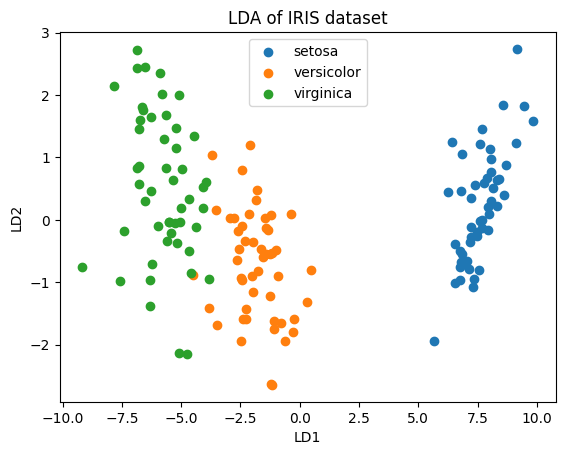

In [6]:

# LDA 모델 생성 및 학습
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)

# 결과 시각화
plt.scatter(X_r2[y == 0, 0], X_r2[y == 0, 1], label='setosa')
plt.scatter(X_r2[y == 1, 0], X_r2[y == 1, 1], label='versicolor')
plt.scatter(X_r2[y == 2, 0], X_r2[y == 2, 1], label='virginica')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA of IRIS dataset')
plt.show()

In [10]:

# 데이터 분할: 학습 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA 모델 생성 및 학습
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lda.predict(X_test)

# 분류 결과 출력
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Evaluation

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc


In [17]:

# 데이터 로드 및 분할
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_probs = knn.predict_proba(X_test)[:, 1]  # positive class에 대한 확률


In [18]:

# 다양한 임계값에 대한 메트릭 계산
taus = np.linspace(0, 1, 10)
f1_scores = []
precisions = []
recalls = []

for tau in taus:
    y_pred = (y_probs > tau).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    print(f"Threshold (Tau) = {tau:.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(f"F1 Score: {f1_scores[-1]:.3f}, Precision: {precisions[-1]:.3f}, Recall: {recalls[-1]:.3f}")
    print("-----------------------------------------------------")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


Threshold (Tau) = 0.00
[[ 49  14]
 [  0 108]]
F1 Score: 0.939, Precision: 0.885, Recall: 1.000
-----------------------------------------------------
Threshold (Tau) = 0.11
[[ 49  14]
 [  0 108]]
F1 Score: 0.939, Precision: 0.885, Recall: 1.000
-----------------------------------------------------
Threshold (Tau) = 0.22
[[ 53  10]
 [  0 108]]
F1 Score: 0.956, Precision: 0.915, Recall: 1.000
-----------------------------------------------------
Threshold (Tau) = 0.33
[[ 53  10]
 [  0 108]]
F1 Score: 0.956, Precision: 0.915, Recall: 1.000
-----------------------------------------------------
Threshold (Tau) = 0.44
[[ 57   6]
 [  1 107]]
F1 Score: 0.968, Precision: 0.947, Recall: 0.991
-----------------------------------------------------
Threshold (Tau) = 0.56
[[ 57   6]
 [  1 107]]
F1 Score: 0.968, Precision: 0.947, Recall: 0.991
-----------------------------------------------------
Threshold (Tau) = 0.67
[[63  0]
 [ 9 99]]
F1 Score: 0.957, Precision: 1.000, Recall: 0.917
---------------

/home/user/miniconda3/envs/trade/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


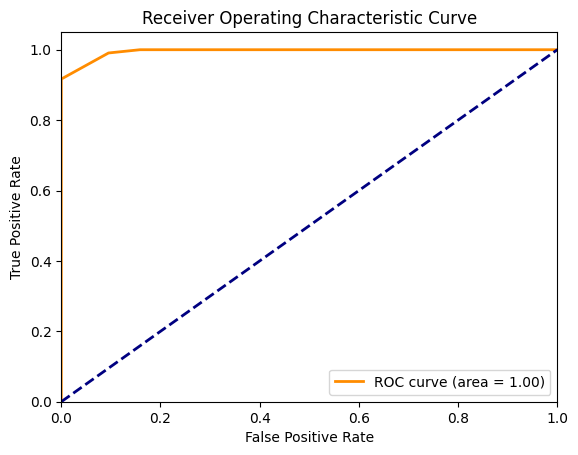

In [19]:

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 실제 값과 예측 확률
y_true = [1, 0, 0, 1, 1]  # 실제 클래스 레이블
y_scores = [0.8, 0.6, 0.3, 0.7, 0.4]  # 예측된 확률

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

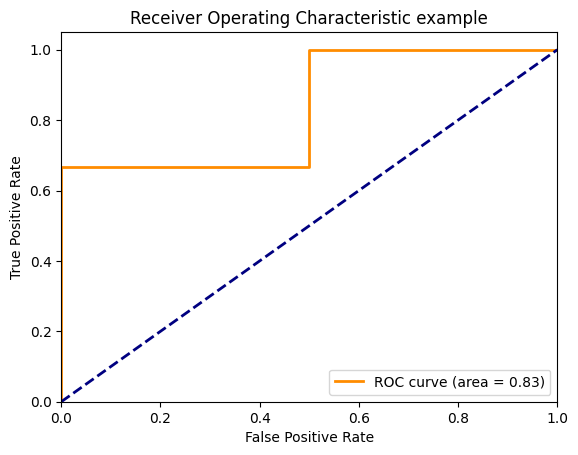

In [21]:
# ROC 커브 그리기
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

# SVM

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 데이터 생성
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)


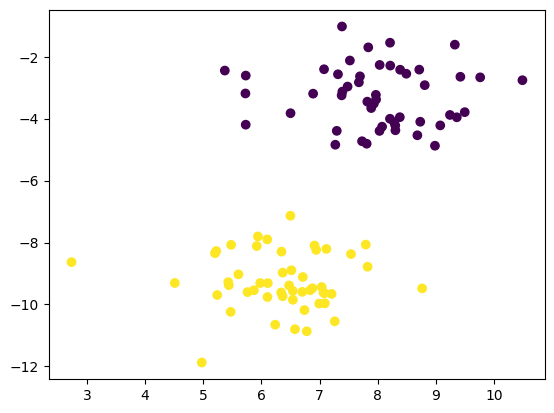

In [54]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [55]:

# 모델
clf_linear = SVC(kernel='linear', C=1e5)  # Linear SVM
clf_soft_margin = SVC(kernel='linear', C=0.1)  # Soft Margin SVM
clf_rbf = SVC(kernel='rbf', gamma=0.7, C=1e5)  # Kernel SVM

# 모델 학습
clf_linear.fit(X, y)
clf_soft_margin.fit(X, y)
clf_rbf.fit(X, y)

SVC(C=100000.0, gamma=0.7)

In [56]:

# 시각화 함수
def plot_svm(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 모델의 결정 경계 및 마진 플롯
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

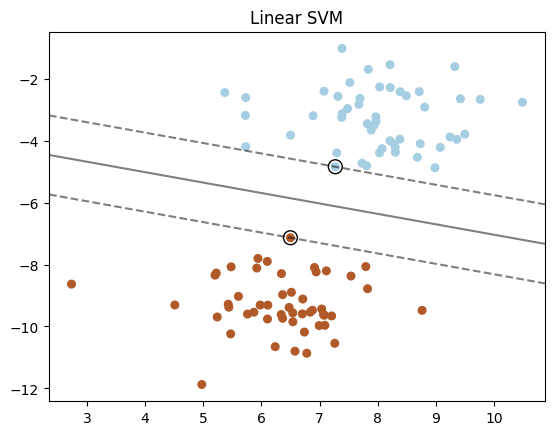

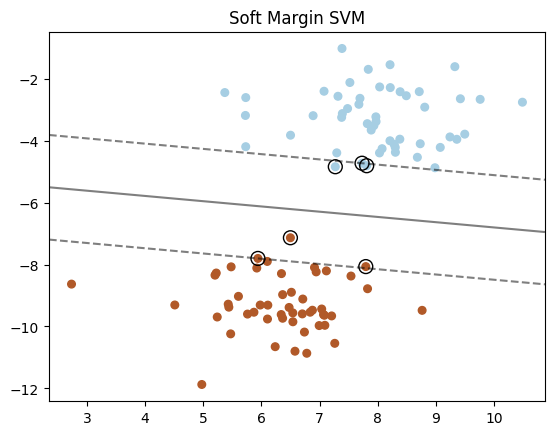

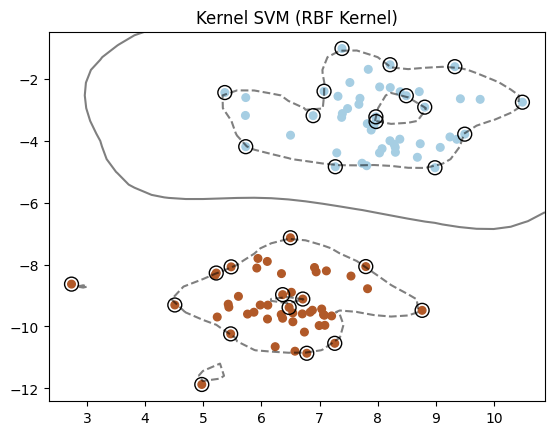

In [47]:

# 각 모델에 대한 시각화
plot_svm(clf_linear, X, y, "Linear SVM")
plot_svm(clf_soft_margin, X, y, "Soft Margin SVM")
plot_svm(clf_rbf, X, y, "Kernel SVM (RBF Kernel)")